# Arctic Ice

### Data Scrub

* imports csv and convert to pandas dataframes
* remove awkward characters from columns
* removes unnecessary columns
* merges dataframes
* changd code to systematically find csvs

 ### Merging
 
 * merges dataframes into single
 * remove unwanted columns
 * remove unwanted years / rows
 
 ### Error removal
 
 * Errors identified and replaced with nans
 * nans replaced using highlighed code, default is linear interpolation
 

## Imports

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

***

## Complete Datasets

***

### Arctic Ice

In [2]:
#implemented using salaars code
filepath = '../Data/Arctic_Ice_Monthly/*.csv'
csv_files = glob.glob(filepath)

for i in range(len(csv_files)):
    csv_files[i] = csv_files[i][27:]
    
raw_ds = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)

In [3]:
#I change some column headings to remove special characters
import pandas as pd

raw_ds.columns = raw_ds.columns.str.replace('-', '')
raw_ds.columns = raw_ds.columns.str.replace(' ', '')

In [4]:
# The dataframe is sorted by year, then month. Reorganizing the data month by month. 
raw_ds = raw_ds.sort_values(by=['year', 'mo'])
raw_ds = raw_ds.reset_index(drop=True)

In [5]:
#seperates into analysis_df, which is to be used for analysis, and 2023_df.
#2023 data was seperated into as it uses a new datatype this could
#prove an issue as all other data is Godddard type

a = raw_ds.loc[62:529]
df_2023 = raw_ds.loc[530:]

***

### Temp

In [6]:
#takes temp data from csv file and drops irrelvant columns
t = pd.read_csv('../Data/Temps.csv')
t = t[['TAVG']]
t = t.rename(columns={"TAVG": "temp"})

#cuts down the data to the years and months covered by arctiv ice data
t =  t.loc[822:1289]

***

### Methane

In [7]:
#takes temp data from csv file and drops irrelvant columns
m = pd.read_csv('../Data/Methane.csv')
m = m[['average']]
m = m.rename(columns={"average": "methane"})

#cuts down the data to the years and months covered by arctiv ice data
m =  m.loc[6:473] 

In [8]:
#takes temp data from csv file and drops irrelvant columns
c = pd.read_csv('../Data/Carbon_Dioxide.csv')
c = c[['average']]
c = c.rename(columns={"average": "CO2"})

#cuts down the data to the years and months covered by arctiv ice data
#m =  m.loc[6:473] 
c =  c.loc[60:527]

***

## Merging

In [9]:
a, m, t, c = a.reset_index(), m.reset_index(), t.reset_index(), c.reset_index()

all_data = pd.concat([a, t, m, c,], axis=1, join="inner")
all_data = all_data.drop(['index','datatype', 'region'], axis=1)

all_data

,year,mo,extent,area,temp,methane,CO2
0,1984,1,14.47,11.68,-26.27,1638.77,344.32
1,1984,2,15.30,12.26,-36.08,1638.87,344.82
2,1984,3,15.58,12.55,-26.93,1640.82,344.96
3,1984,4,15.01,12.18,-23.68,1643.96,345.19
4,1984,5,13.58,10.88,-8.59,1643.16,345.33
...,...,...,...,...,...,...,...
463,2022,8,5.95,4.03,4.09,1908.78,414.41
464,2022,9,4.90,3.47,1.91,1915.46,414.63
465,2022,10,6.66,5.25,-4.07,1920.11,416.14
466,2022,11,9.73,8.52,-9.97,1923.75,417.77


In [10]:
all_data = all_data.rename(columns={"mo": "month"})
all_data

,year,month,extent,area,temp,methane,CO2
0,1984,1,14.47,11.68,-26.27,1638.77,344.32
1,1984,2,15.30,12.26,-36.08,1638.87,344.82
2,1984,3,15.58,12.55,-26.93,1640.82,344.96
3,1984,4,15.01,12.18,-23.68,1643.96,345.19
4,1984,5,13.58,10.88,-8.59,1643.16,345.33
...,...,...,...,...,...,...,...
463,2022,8,5.95,4.03,4.09,1908.78,414.41
464,2022,9,4.90,3.47,1.91,1915.46,414.63
465,2022,10,6.66,5.25,-4.07,1920.11,416.14
466,2022,11,9.73,8.52,-9.97,1923.75,417.77


***

## Error removal

replaces errors with nans

In [11]:
all_data.loc[43, 'area'] = pd.NA
all_data.loc[47, 'area'] = pd.NA
all_data.loc[47, 'extent'] = pd.NA
all_data.loc[48, 'area'] = pd.NA
all_data.loc[48, 'extent'] = pd.NA

#all_data.describe()

Uses linear interpolation to replace the nans

***
# Error replacement

This line replaces the errors currently set to use linear interpolation. To change, simply change `method=linear`

In [12]:
all_data.interpolate(method='linear', axis=0, limit=None, inplace=True)

***

# Split by Month, Year, etc

***
## Yearly means

This new dataframe contains the yearly means for all columns

In [13]:
annual_means =  all_data.groupby(['year']).mean().drop(["month"], axis=1)

***
## Monthly means

This new dataframe contains the mean for each month across the years

In [14]:
month_means =  all_data.groupby(['month']).mean().drop(["year"], axis=1)

***

## One month across the years

This dataframe contains the data for each individual month, across all the years. For exaple all the Januaries across the recorded years

In [15]:
m_names = list(range(1,13))
m_data = []

for i in range(len(m_names)):
    appended = all_data.loc[lambda df: df['month'] == m_names[i]]
    m_data.append(appended)
    
single_month_data = dict(zip(m_names, m_data));

Use this function to get the data for individual months. For example
`month_getter(1)` will return all January data across all years

In [16]:
def month_getter(m):
    result = single_month_data[m].drop(["month"], axis=1)
    return result

***

***

# Youssef Salaar Bridge

This just changes some column and variable names so my preprocessed data works with salaars model

In [50]:
def YS_bridge(ydf):
    sdf = ydf.copy(deep=True).reset_index()
    sdf = sdf.rename(columns={'extent': 'extent_avg', 'area': 'area_avg', 'temp': 'temp_avg', 'methane': 'CH4_avg', 'CO2': 'CO2_avg'})
    
    return sdf

Processed_Dataset = YS_bridge(annual_means);

# Confusion Matrix

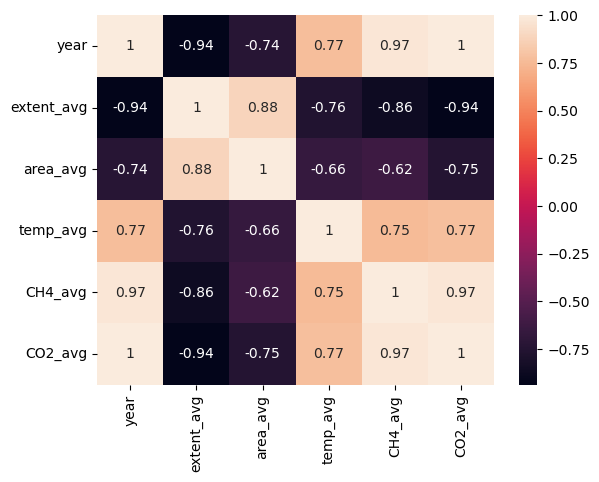

In [51]:
# Plot Correlation matrix for dataset
corr_matrix = Processed_Dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Linear regression model

In [18]:
# Create a linear regression model to predict arctic ice extent using all the features as input
def multivarlinearRegressionModel(df):
    
    # Split the data into features (independent variables) and target (dependent variable)
    X = df[['year', 'temp_avg', 'CH4_avg', 'CO2_avg']]
    #X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Create linear regression model and fit it to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X,Y)

    # Evaluate the model
    y_pred = lin_reg.predict(X)
    mse = mean_squared_error(Y, y_pred)
    print(mse)

    # Plot results to show difference between actual ice extent data versus predicted ice extent data
    for col in X: 
        plt.figure()
        plt.scatter(df[col], Y, color='blue', label='Actual Ice Extent')
        plt.scatter(df[col], y_pred, color='red', label='Predicted Ice Extent', alpha=0.7)
        plt.xlabel(col)
        plt.ylabel('Arctic Ice Extent')
        plt.title('Actual vs Predicted Arctic Ice Extent')
        plt.legend()
        plt.show()
        
    # Plot results to show feature importance relationship with ice extent 
    feature_importance = lin_reg.coef_
    plt.figure()
    plt.bar(['Year', 'Temp', 'CH4', 'CO2'], feature_importance)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title('Feature Importance in Predicting Arctic Ice Extent')
    plt.show()

0.0311675908606992


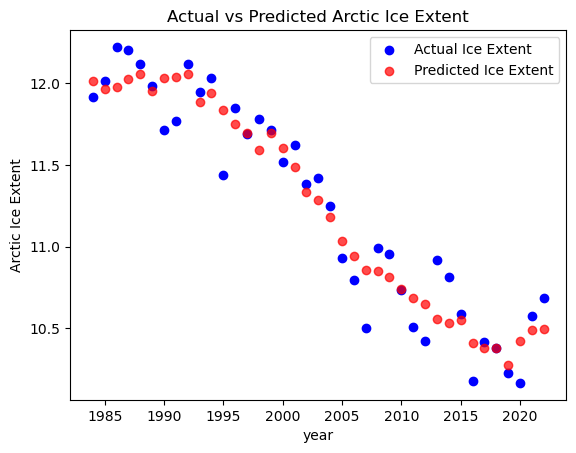

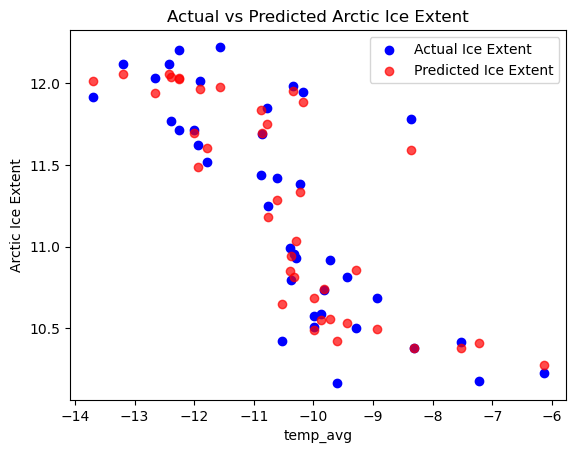

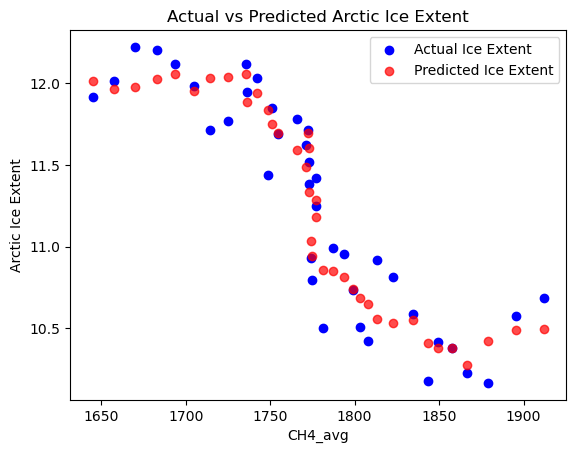

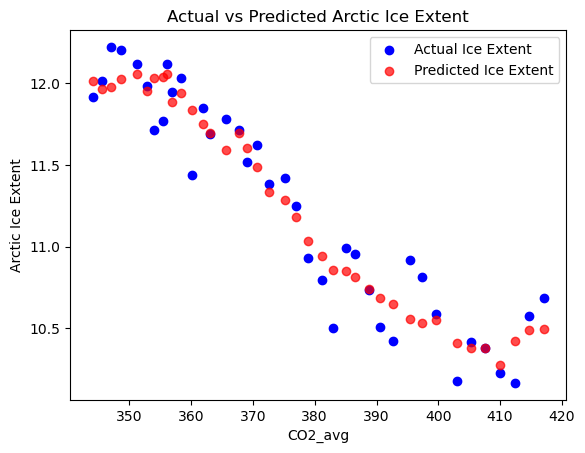

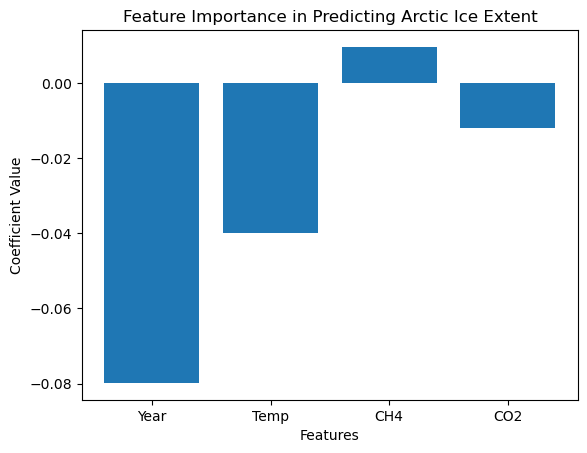

In [19]:
multivarlinearRegressionModel(Processed_Dataset)

year
feature MSE: 
0.05234888535166487


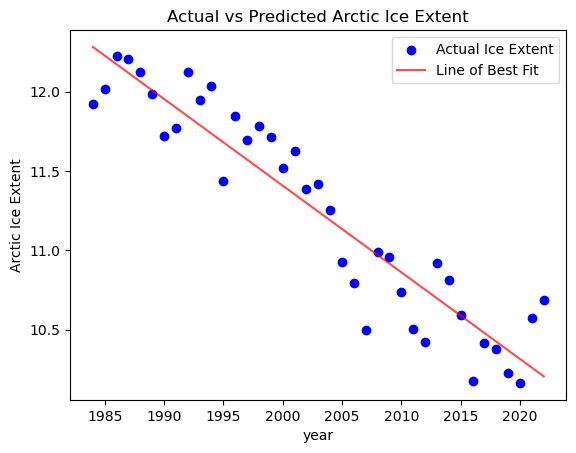

temp_avg
feature MSE: 
0.17893961331628205


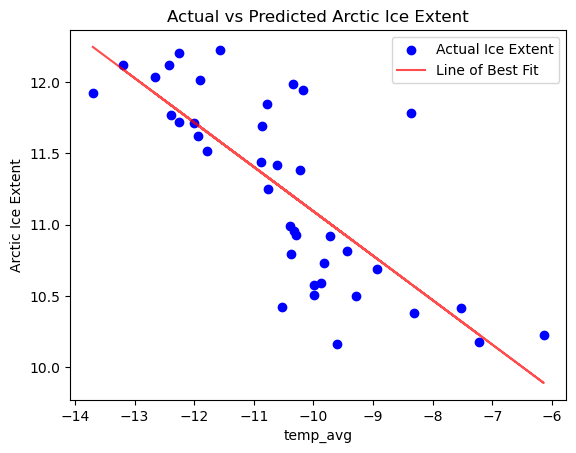

CH4_avg
feature MSE: 
0.1091209880959552


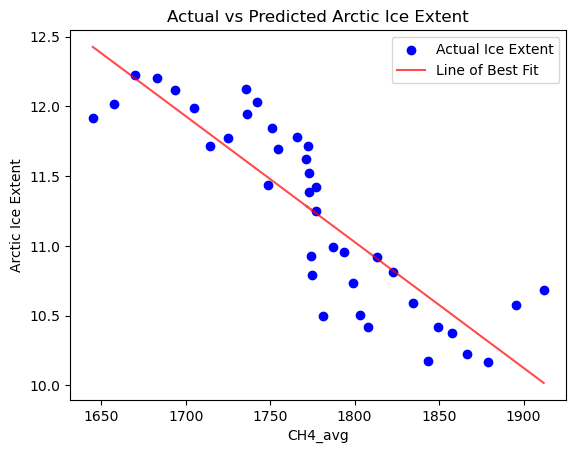

CO2_avg
feature MSE: 
0.05385833245535411


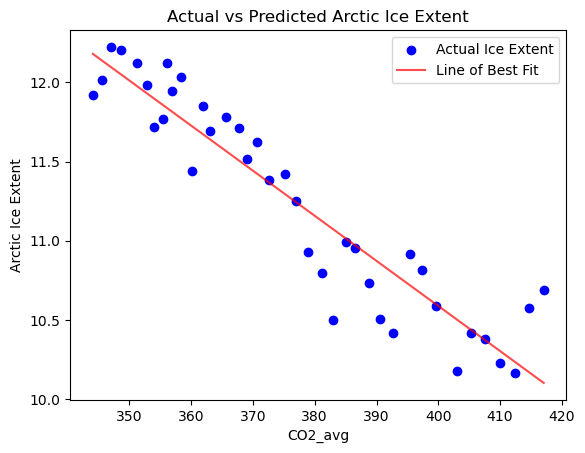

In [54]:
# Creating a linear regression model with each individual feature
def univarlinearRegressionModel(df):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    # Split the data into features (independent variables) and target (dependent variable)
    X = df[['year', 'temp_avg', 'CH4_avg', 'CO2_avg']]
    #X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Plot results to show difference between actual ice extent data versus predicted ice extent data
    for col in X: 
        print(col)
        target = X[col]
        target_reshaped = target.values.reshape(-1,1)

        # Create linear regression model and fit it to the training data
        lin_reg = LinearRegression()
        lin_reg.fit(target_reshaped,Y)

        # Evaluate the model
        y_pred = lin_reg.predict(target_reshaped)
        mse = mean_squared_error(Y, y_pred)
        print('feature MSE: ')
        print(mse)

        plt.figure()
        plt.scatter(df[col], Y, color='blue', label='Actual Ice Extent')
        plt.plot(df[col], y_pred, color='red', label='Line of Best Fit', alpha=0.7)
        plt.xlabel(col)
        plt.ylabel('Arctic Ice Extent')
        plt.title('Actual vs Predicted Arctic Ice Extent')
        plt.legend()
        plt.show()

univarlinearRegressionModel(Processed_Dataset)

# Youssef Extras Ignore if not useful

adapts the univariate linear regression model to be used later for data for individual months. Left as RawNB in case you dont ned them. If you wanna use, chang ehte cell to code.